# Redes Neuronales - Dataset Idealista Madrid

En esta practica vamos a ver cómo crear un modelo de **redes neuronales** para poder predecir el valor de una vivienda, teniendo en cuenta datos de la página *Idealista* en Madrid.

## Paso 1: Descargar el dataset

Primeramente, vamos a descargar este dataset desde la página de *Kaggle*, para poder trabajar con él. El enlace es el siguiente

[Dataset](https://www.kaggle.com/datasets/kanchana1990/madrid-idealista-property-listings)

In [1515]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kanchana1990/madrid-idealista-property-listings")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Alumno_AI\.cache\kagglehub\datasets\kanchana1990\madrid-idealista-property-listings\versions\1


In [1516]:
import pandas as pd
import os

# List files in the directory to find CSV files
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
print("Available CSV files:", csv_files)

# Assuming there's a main CSV file we want to read
# If there are multiple files, you may need to select the specific one you want
if csv_files:
    file_path = os.path.join(path, csv_files[0])
    df = pd.read_csv(file_path)
    print(f"Loaded {csv_files[0]}")
    print(f"Shape: {df.shape}")
    display(df.head())
else:
    print("No CSV files found in the directory.")

Available CSV files: ['idealista_madrid.csv']
Loaded idealista_madrid.csv
Shape: (915, 13)


,url,listingUrl,title,id,price,baths,rooms,sqft,description,address,typology,advertiserProfessionalName,advertiserName
0,https://www.idealista.com/inmueble/104027174/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Villanueva,104027174,1920000,3,3,183,Residencia única con acabados de la más alta c...,"Recoletos, Madrid",Pisos,Promora Madrid,Promora Madrid
1,https://www.idealista.com/inmueble/102321942/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Núñez de Balboa,102321942,1995000,3,3,170,"Preciosa reforma a estrenar, con terrazas y ga...","Castellana, Madrid",Pisos,Madrid MMC,Engel & Völkers Madrid
2,https://www.idealista.com/inmueble/103334142/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Conde Orgaz-Piovera,103334142,1300000,3,4,270,DE SALAS CONSULTORES INMOBILIARIOS MAV02679 le...,"Hortaleza, Madrid",Pisos,De Salas Consultores Inmobiliarios,De Salas Consultores Inmobiliarios
3,https://www.idealista.com/inmueble/104161987/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en Nueva España,104161987,1650000,3,3,248,Gilmar Real Estate vende espectacular piso en ...,"Chamartín, Madrid",Pisos,departamento comercial,Gilmar Viso - Chamartín
4,https://www.idealista.com/inmueble/103989666/,https://www.idealista.com/venta-viviendas/madr...,Piso en venta en calle de Claudio Coello,103989666,1590750,3,3,116,Descubre esta impresionante vivienda exterior ...,"Recoletos, Madrid",Pisos,Walter Haus Salamanca,Walter Haus Madrid


## Paso 2: Visualización de los datos

In [1517]:
# Ver los valores mínimos y máximos de cada variable
print(df[['price', 'baths', 'rooms', 'sqft']].describe())



              price       baths       rooms         sqft
count  9.150000e+02  915.000000  915.000000   915.000000
mean   1.290575e+06    2.900546    3.474317   217.238251
std    1.036640e+06    1.626487    1.594625   191.745826
min    1.220000e+05    1.000000    0.000000    14.000000
25%    6.250000e+05    2.000000    2.000000   104.000000
50%    9.900000e+05    3.000000    3.000000   158.000000
75%    1.650000e+06    4.000000    4.000000   264.000000
max    8.900000e+06   12.000000   12.000000  1768.000000


## Paso 3: Limpieza de los datos

In [1518]:
df = df[['baths', 'rooms', 'address', 'sqft', 'typology', 'price']]

df['neighborhood'] = df['address'].str.split(',').str[0]
df = df.drop(columns=['address'])

df.head()

,baths,rooms,sqft,typology,price,neighborhood
0,3,3,183,Pisos,1920000,Recoletos
1,3,3,170,Pisos,1995000,Castellana
2,3,4,270,Pisos,1300000,Hortaleza
3,3,3,248,Pisos,1650000,Chamartín
4,3,3,116,Pisos,1590750,Recoletos


In [1519]:
# Verificar valores nulos
print("Valores nulos en el dataset:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Valores nulos en el dataset:
Series([], dtype: int64)


In [1520]:
df = df[
    (df['price'] > 0) &
    (df['baths'] > 0) &
    (df['rooms'] > 0) &
    (df['sqft'] > 10) &
    (df['neighborhood'].notnull()) &
    (df['typology'].notnull()) 
]

df = df[(df["price"] < 3500000)]

C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_16080\2915125772.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='baths', data=df, ax=axes[0, 1], palette='viridis')
C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_16080\2915125772.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rooms', data=df, ax=axes[1, 0], palette='magma')


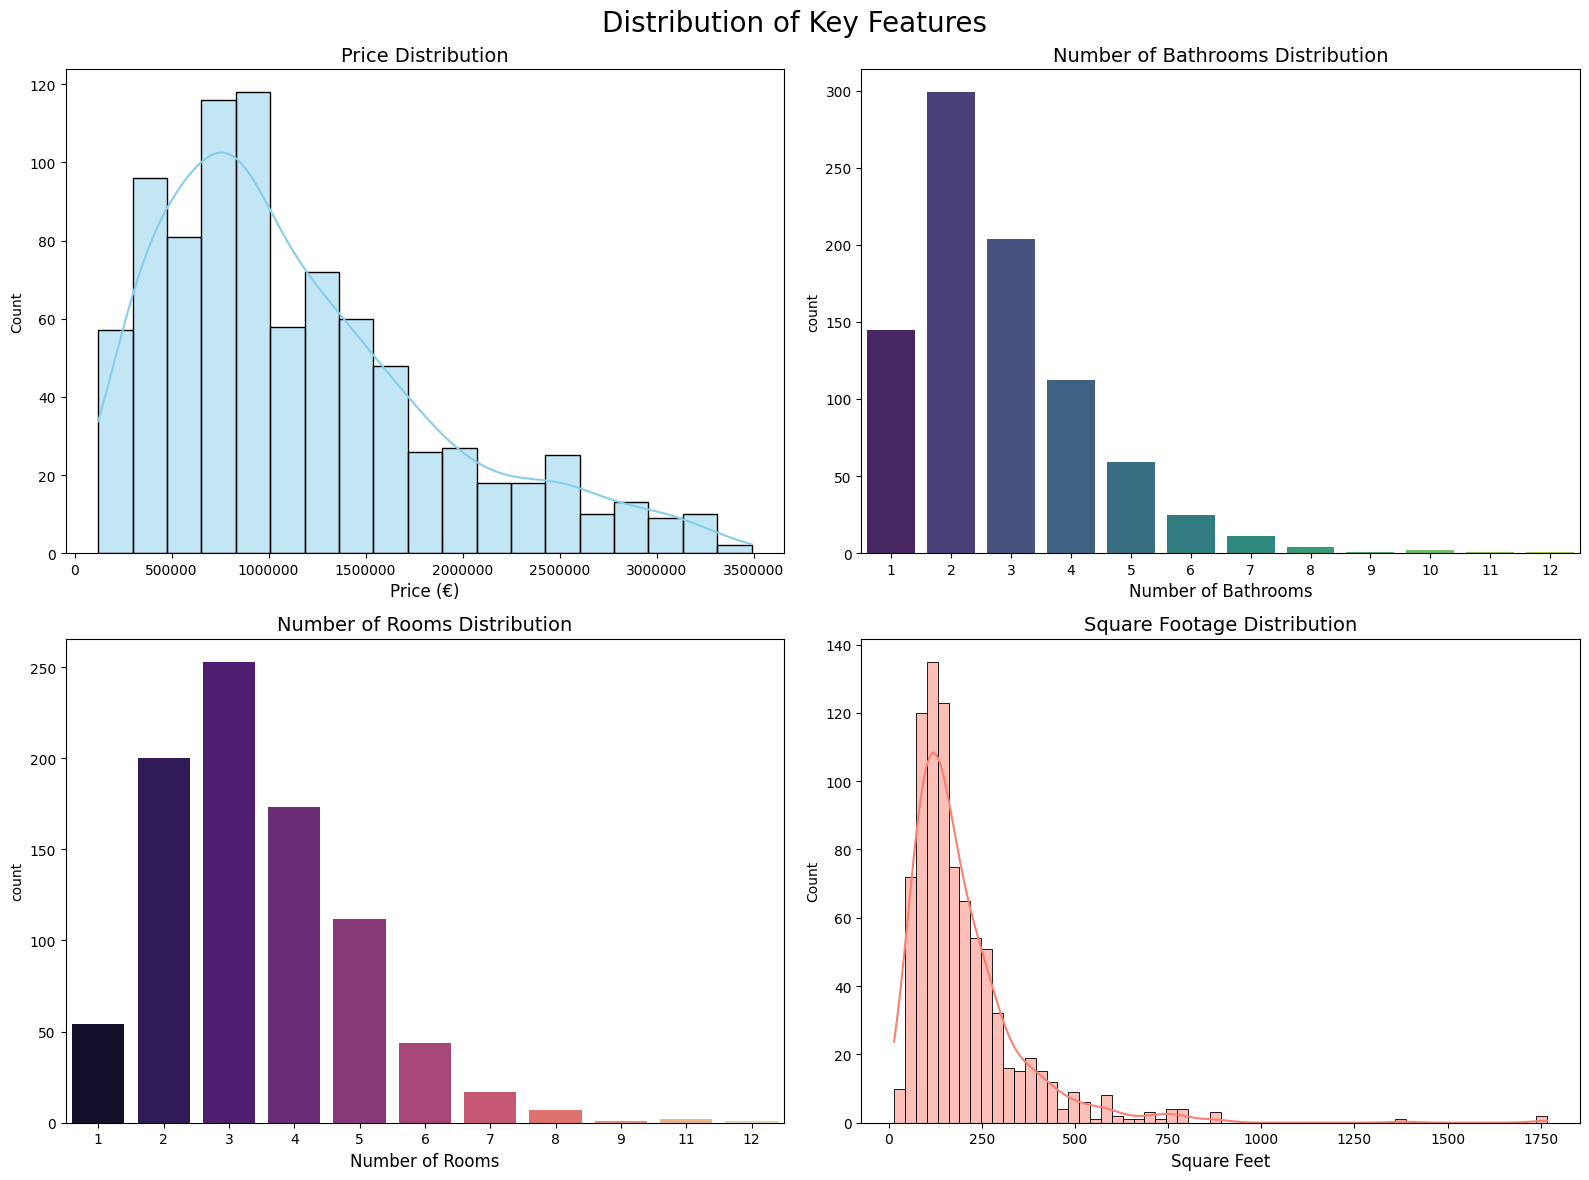

In [1521]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution of Key Features', fontsize=20, y=0.98)

# Plot price distribution
sns.histplot(df['price'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Price (€)', fontsize=12)
axes[0, 0].ticklabel_format(style='plain', axis='x')

# Plot baths distribution
sns.countplot(x='baths', data=df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Number of Bathrooms Distribution', fontsize=14)
axes[0, 1].set_xlabel('Number of Bathrooms', fontsize=12)

# Plot rooms distribution
sns.countplot(x='rooms', data=df, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Number of Rooms Distribution', fontsize=14)
axes[1, 0].set_xlabel('Number of Rooms', fontsize=12)

# Plot sqft distribution
sns.histplot(df['sqft'], kde=True, ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Square Footage Distribution', fontsize=14)
axes[1, 1].set_xlabel('Square Feet', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

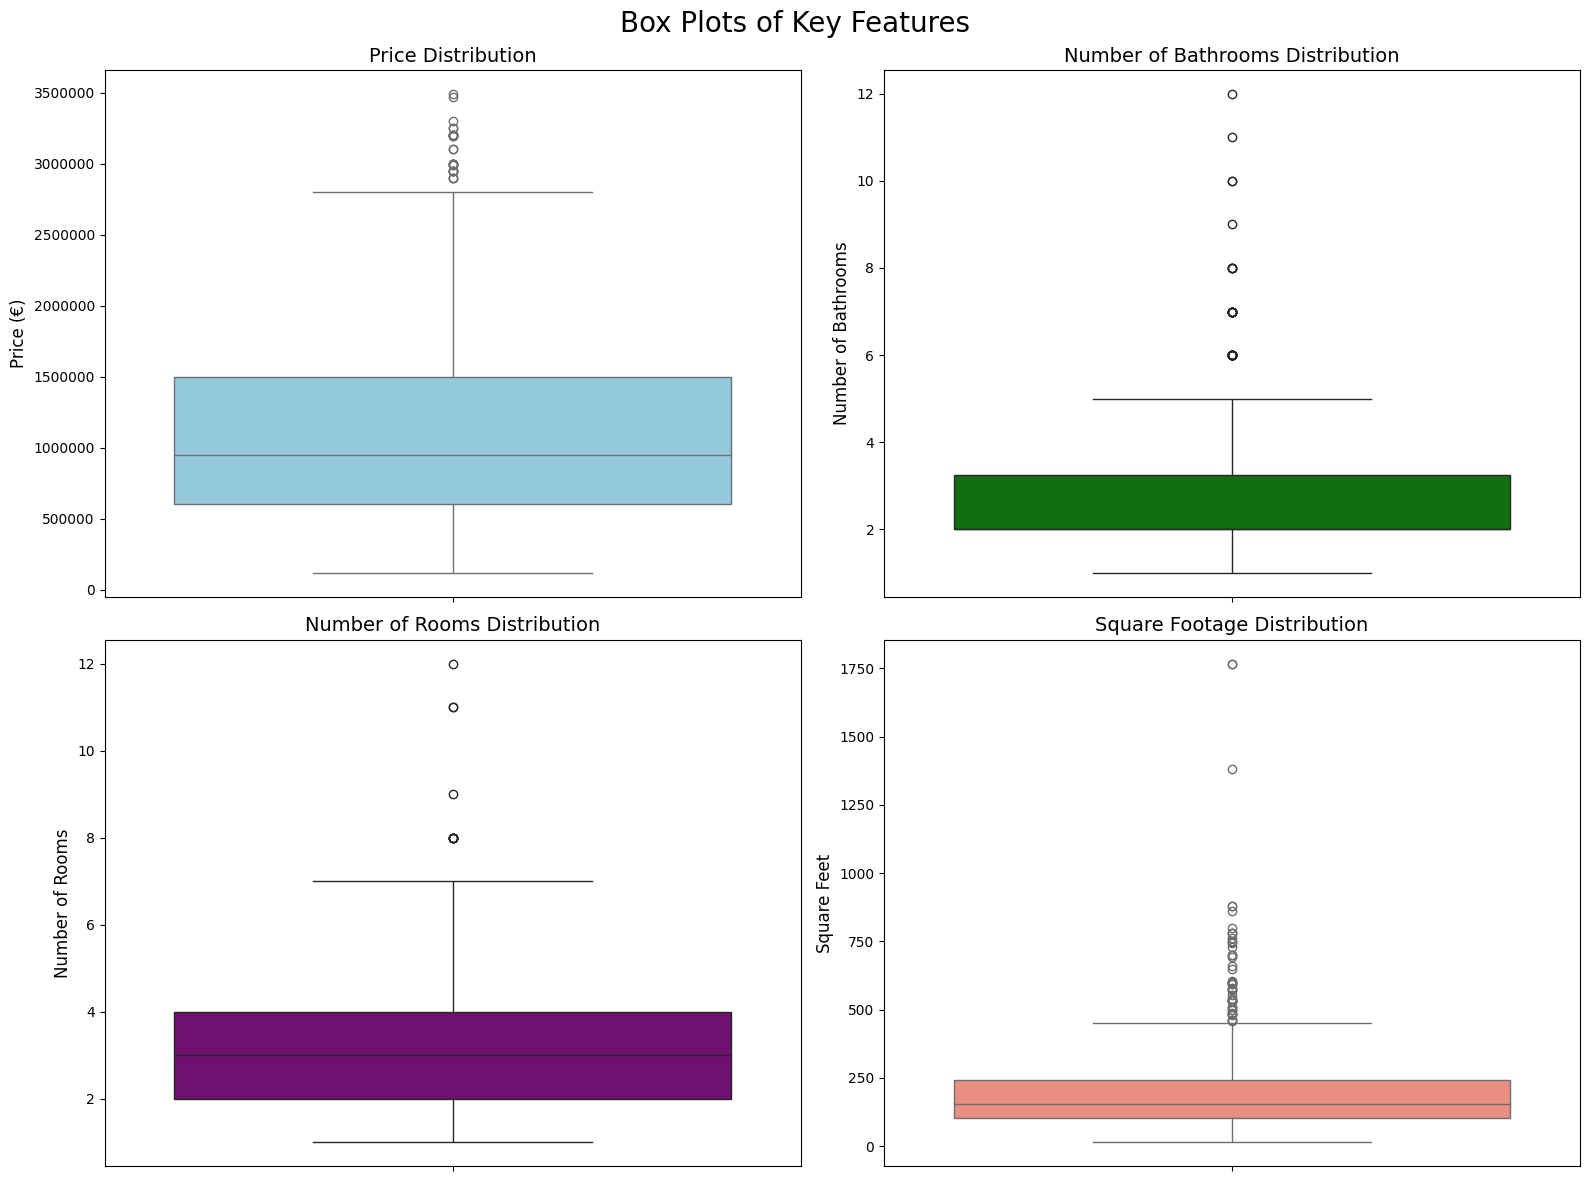

In [1522]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Box Plots of Key Features', fontsize=20, y=0.98)

# Plot price box plot
sns.boxplot(y=df['price'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Price Distribution', fontsize=14)
axes[0, 0].set_ylabel('Price (€)', fontsize=12)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Plot baths box plot
sns.boxplot(y=df['baths'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Number of Bathrooms Distribution', fontsize=14)
axes[0, 1].set_ylabel('Number of Bathrooms', fontsize=12)

# Plot rooms box plot
sns.boxplot(y=df['rooms'], ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Number of Rooms Distribution', fontsize=14)
axes[1, 0].set_ylabel('Number of Rooms', fontsize=12)

# Plot sqft box plot
sns.boxplot(y=df['sqft'], ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Square Footage Distribution', fontsize=14)
axes[1, 1].set_ylabel('Square Feet', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [1523]:
Q1 = df['price'].quantile(0.25)  # Primer cuartil (25%)
Q3 = df['price'].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detección de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR  # Este es el que más nos interesa

# Filtrar datos dentro del rango aceptable
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Mostrar cuántos datos fueron eliminados
print(f"Datos originales: {len(df)}, Datos después del filtrado: {len(df_filtered)}")

Datos originales: 864, Datos después del filtrado: 835


Una vez hemos visualizado los datos, vamos a pensar en cuáles de todos estos datos nos son verdaderamente útiles. Esta determinación viene principalmente con el pensamiento crítico de entender qué es lo realmente importante a la hora de crear y entrenar el modelo, por lo que, desde mi punto de vista estos son los campos clave:

- `price`

- `baths`

- `rooms`

- `address`

- `sqft`

- `typology`

Entre ellos, tenemos que entender que el campo `price` es el campo a predecir, por lo tanto lo asignaremos como `label` y el resto como `features`

In [1524]:
features = df.drop('price', axis=1).copy()

label = df['price'].copy()

print("Features shape:", features.shape)
print("Label shape:", label.shape)

Features shape: (864, 5)
Label shape: (864,)


In [1525]:
features.head()

,baths,rooms,sqft,typology,neighborhood
0,3,3,183,Pisos,Recoletos
1,3,3,170,Pisos,Castellana
2,3,4,270,Pisos,Hortaleza
3,3,3,248,Pisos,Chamartín
4,3,3,116,Pisos,Recoletos


In [1526]:
unique_neighborhoods = features['neighborhood'].nunique()
neighborhood_counts = features['neighborhood'].value_counts()

# Print summary
print(f"Total number of distinct neighborhoods: {unique_neighborhoods}")
print("\nNeighborhood distribution:")
print(neighborhood_counts)

Total number of distinct neighborhoods: 104

Neighborhood distribution:
neighborhood
Barrio de Salamanca           57
Hortaleza                     54
Chamartín                     50
Centro                        46
Moncloa                       43
                              ..
Casco Histórico de Barajas     1
El Plantío                     1
Arganzuela                     1
Canillejas                     1
San Juan Bautista              1
Name: count, Length: 104, dtype: int64


## Generación de datos sintéticos

## Feature engineering

In [1527]:
import numpy as np

# Feature Engineering

def feature_engineering(x):
    """
    Realiza ingeniería de características en el DataFrame dado.
    """
    # Crear una copia del DataFrame original
    features = x.copy()
    # 3. Space per room
    features['sqft_per_room'] = df['sqft'] / df['rooms']
    features["sqft_per_room"].replace([np.inf, -np.inf], 0, inplace=True)

    features['sqft_per_bath'] = df['sqft'] / df['baths']
    features["sqft_per_bath"].replace([np.inf, -np.inf], 0, inplace=True)

    features["bath_to_room_ratio"] = df["baths"] / df["rooms"]
    features["bath_to_room_ratio"].replace([np.inf, -np.inf], 0, inplace=True)

    features["sqft_rooms_interaction"] = df["sqft"] * df["rooms"]

    features["luxury_score"] = (df["sqft"] * features["bath_to_room_ratio"]) / df["rooms"]

    # 4. Total rooms (bathrooms + bedrooms)
    features['total_rooms'] = df['rooms'] + df['baths']

    # 5. Is luxury property (based on percentiles)

    size_threshold = np.percentile(df['sqft'], 75)
    features['is_luxury'] = ((df['sqft'] > size_threshold)).astype(int)

    # 6. Neighborhood statistics
    neighborhood_avg = df.groupby('neighborhood')['price'].mean().to_dict()
    neighborhood_median = df.groupby('neighborhood')['price'].median().to_dict()

    features['neighborhood_price_avg'] = df['neighborhood'].map(neighborhood_avg)
    features["neighborhood_price_median"] = df["neighborhood"].map(neighborhood_median)

    features["avg_sqft_neighborhood "] = df["neighborhood"].map(df.groupby("neighborhood")["sqft"].mean())
    features["avg_rooms_neighborhood "] = df["neighborhood"].map(df.groupby("neighborhood")["rooms"].mean())

    features["neighborhood_density"] = features["neighborhood_price_median"] / df["sqft"]
    # 9. Room density (rooms per 100 sqft)
    features['room_density'] = (df['rooms'] / df['sqft']) * 100

    features["log_sqft"] = np.log1p(df["sqft"])

    features["typology"] = features["typology"] == "Pisos"

    features = features.drop(columns=["neighborhood"])

    return features

features = feature_engineering(features)
# Display new features
print(f"Features shape after engineering: {features.shape}")
features.head()

Features shape after engineering: (864, 18)


C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_16080\403786450.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features["sqft_per_room"].replace([np.inf, -np.inf], 0, inplace=True)
C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_16080\403786450.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

,baths,rooms,sqft,typology,sqft_per_room,sqft_per_bath,bath_to_room_ratio,sqft_rooms_interaction,luxury_score,total_rooms,is_luxury,neighborhood_price_avg,neighborhood_price_median,avg_sqft_neighborhood,avg_rooms_neighborhood,neighborhood_density,room_density,log_sqft
0,3,3,183,True,61.000000,61.000000,1.00,549,61.000000,6,0,1.611917e+06,1598000.0,144.933333,2.733333,8732.240437,1.639344,5.214936
1,3,3,170,True,56.666667,56.666667,1.00,510,56.666667,6,0,1.549214e+06,1450000.0,163.714286,3.071429,8529.411765,1.764706,5.141664
2,3,4,270,True,67.500000,90.000000,0.75,1080,50.625000,7,1,1.425537e+06,1495000.0,319.314815,4.314815,5537.037037,1.481481,5.602119
3,3,3,248,True,82.666667,82.666667,1.00,744,82.666667,6,1,1.630700e+06,1497500.0,237.520000,4.040000,6038.306452,1.209677,5.517453
4,3,3,116,True,38.666667,38.666667,1.00,348,38.666667,6,0,1.611917e+06,1598000.0,144.933333,2.733333,13775.862069,2.586207,4.762174


## Normalizando los datos

In [1528]:
from sklearn.preprocessing import StandardScaler

def scale_features(x):
    features = x.copy()

    scaler = StandardScaler()

    columns_to_normalize = [
        # Original numerical features
        'rooms', 'baths', 'sqft',
        
        # Price-related features
        'neighborhood_price_avg', "neighborhood_price_median", "luxury_score", "neighborhood_density",
        
        # Ratio features
        'sqft_per_room', 'room_density', "sqft_per_bath", "sqft_rooms_interaction",

        # log values
        'log_sqft',

        "avg_sqft_neighborhood ", "avg_rooms_neighborhood ",
        
        # Count features
        'total_rooms'
    ]

    features[columns_to_normalize] = scaler.fit_transform(features[columns_to_normalize])

    return features


features = scale_features(features)

features.head()

,baths,rooms,sqft,typology,sqft_per_room,sqft_per_bath,bath_to_room_ratio,sqft_rooms_interaction,luxury_score,total_rooms,is_luxury,neighborhood_price_avg,neighborhood_price_median,avg_sqft_neighborhood,avg_rooms_neighborhood,neighborhood_density,room_density,log_sqft
0,0.140332,-0.271477,-0.107670,True,0.166831,-0.371793,1.00,-0.253687,0.229476,-0.070101,0,1.054331,1.149368,-0.563557,-0.779043,0.352005,-0.531932,0.198164
1,0.140332,-0.271477,-0.187691,True,0.002044,-0.549693,1.00,-0.285151,0.126330,-0.070101,0,0.914083,0.834869,-0.373053,-0.390301,0.309925,-0.372808,0.083188
2,0.140332,0.389245,0.427853,True,0.414011,0.818771,0.75,0.174695,-0.017480,0.282035,1,0.637453,0.930494,1.205277,1.039345,-0.310888,-0.732309,0.805722
3,0.140332,-0.271477,0.292433,True,0.990765,0.517709,1.00,-0.096372,0.745209,-0.070101,1,1.096344,0.935806,0.375594,0.723363,-0.206893,-1.077314,0.672866
4,0.140332,-0.271477,-0.520085,True,-0.682454,-1.288663,1.00,-0.415844,-0.302125,-0.070101,0,1.054331,1.149368,-0.563557,-0.779043,1.398380,0.669934,-0.512298


In [1529]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el scaler
scaler_price = MinMaxScaler()

def min_max_scaling(y):
    prices = y.copy()

    # Normalizar la columna 'price'
    prices = np.log1p(prices)

    label_scaled = scaler_price.fit_transform(prices.values.reshape(-1, 1))

    return label_scaled


# Al final tendrás el vector normalizado de precios
label_scaled = min_max_scaling(label)

print(label_scaled[:5])

[[0.82181199]
 [0.83323807]
 [0.70553175]
 [0.77662218]
 [0.76571767]]


Feature correlations with price (sorted):
price                        1.000000
log_sqft                     0.773670
baths                        0.722293
total_rooms                  0.698361
sqft                         0.691139
neighborhood_price_avg       0.622047
is_luxury                    0.611855
neighborhood_price_median    0.590709
rooms                        0.590052
sqft_rooms_interaction       0.584624
sqft_per_room                0.524119
luxury_score                 0.422204
avg_sqft_neighborhood        0.412782
avg_rooms_neighborhood       0.387793
sqft_per_bath                0.341336
bath_to_room_ratio           0.317812
neighborhood_density        -0.295257
typology                    -0.389248
room_density                -0.552008
Name: price, dtype: float64


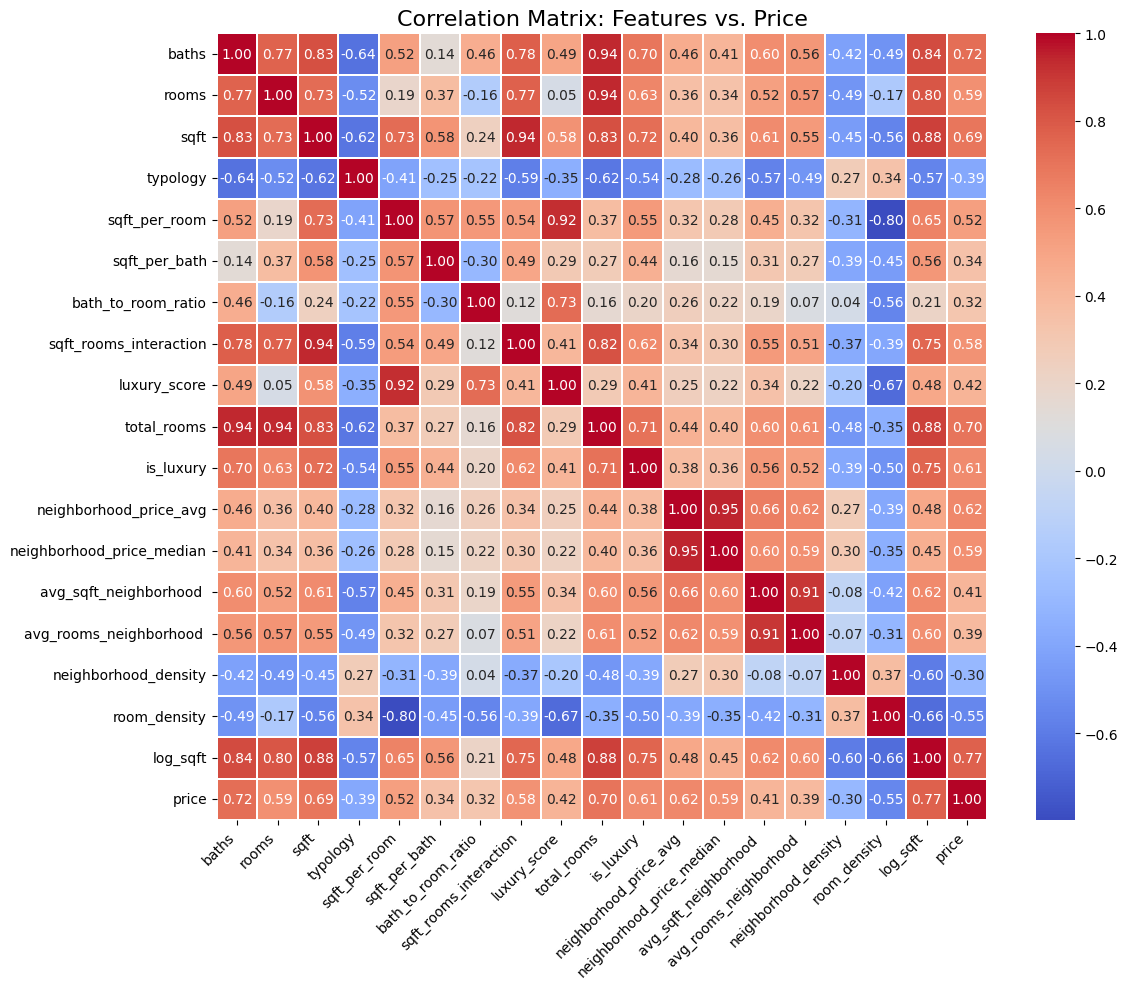

In [1530]:
# Create a copy of the features dataframe to avoid modifying the original
features_corr = features.copy()

columns_to_print = [col for col in features.columns]


# Combine numeric features with encoded categorical features
correlation_df = pd.concat([
    features_corr[columns_to_print],
    label
], axis=1)

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Create heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f',
            linewidths=0.2)
plt.title('Correlation Matrix: Features vs. Price', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Print correlations with price (sorted)
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print("Feature correlations with price (sorted):")
print(price_correlations)

In [1531]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.regularizers import l2, l1_l2
import tensorflow.keras as keras

In [1532]:
print("features shape:", features.shape)
print("label_scaled shape:", label_scaled.shape)

features shape: (864, 18)
label_scaled shape: (864, 1)


In [1533]:
from sklearn.model_selection import train_test_split

_, X_test, _, y_test = train_test_split(features, label_scaled, test_size=0.35, random_state=42)

In [1534]:
test_indices = X_test.index

df_clean = df[~df.index.isin(test_indices)]

print(f"DataFrame original: {df.shape[0]} filas")
print(f"X_test: {X_test.shape[0]} filas")
print(f"DataFrame limpio: {df_clean.shape[0]} filas")
print(f"Filas removidas: {df.shape[0] - df_clean.shape[0]}")

df= df_clean

DataFrame original: 864 filas
X_test: 303 filas
DataFrame limpio: 561 filas
Filas removidas: 303


In [1535]:
import smogn

print("Valores NaN en el DataFrame:")
print(df.isna().sum())

df_reset = df.reset_index(drop=True).copy()

df_smogn = smogn.smoter(
    data=df_reset, 
    y="price", 
    k=5,  # Número de vecinos a considerar
    samp_method="balance"  # Puede ser "balanceado" o "extremo"
)

df = pd.concat([df, df_smogn], axis=0)

Valores NaN en el DataFrame:
baths           0
rooms           0
sqft            0
typology        0
price           0
neighborhood    0
dtype: int64


r_index: 100%|##########| 10/10 [00:00<00:00, 736.89it/s]
c:\Users\Alumno_AI\Documents\hugoM\venv\Lib\site-packages\smogn\over_sampling.py:439: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      Pisos
1      Pisos
2      Pisos
3      Pisos
4      Pisos
       ...  
185    Pisos
186    Pisos
187    Pisos
188    Pisos
189    Pisos
Name: 3, Length: 190, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_new.iloc[:, j] = data_new.iloc[:, j].replace(x, cat_list[x])
c:\Users\Alumno_AI\Documents\hugoM\venv\Lib\site-packages\smogn\over_sampling.py:439: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      Moncloa
1      Moncloa
2      Moncloa
3          1.0
4      Moncloa
        ...   
185    Moncloa
186        7.0
187    Moncloa
188    Moncloa
189        3.0
Name: 4, Length: 190, dtype: obj

In [1536]:
df_smogn.head()

,baths,rooms,sqft,typology,price,neighborhood
0,3.0,4.0,299.0,Pisos,2066762.0,Moncloa
1,3.0,4.0,321.0,Pisos,1890198.0,Moncloa
2,2.0,4.0,235.0,Pisos,1884720.0,Moncloa
3,3.0,4.0,313.0,Pisos,2152619.0,El Viso
4,4.0,5.0,373.0,Pisos,1901817.0,Moncloa


In [1537]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import norm

# def generate_synthetic_real_estate_data(n_samples, df=df):
#     """
#     Genera datos sintéticos inmobiliarios realistas incluyendo precios
#     """
#     # 1. Analizar distribuciones originales
#     neighborhoods = df['neighborhood'].unique()
#     neighborhood_weights = df['neighborhood'].value_counts(normalize=True)
    
#     # Extraer valores únicos y probabilidades para typology
#     typology_values = ["Pisos", "Independientes"]
#     pisos_prob = (df['typology'] == "Pisos").mean()
    
#     # 2. Analizar correlaciones entre variables numéricas
#     numeric_cols = ['rooms', 'baths', 'sqft', 'price']
#     corr_matrix = df[numeric_cols].corr()
#     means = df[numeric_cols].mean().values
#     stds = df[numeric_cols].std().values
    
#     # 3. Generar datos correlacionados
#     cov = np.outer(stds, stds) * corr_matrix.values
#     chol = np.linalg.cholesky(cov)
    
#     uncorrelated = np.random.normal(size=(n_samples, len(numeric_cols)))
#     correlated = np.dot(uncorrelated, chol.T) + means
    
#     # 4. Crear DataFrame sintético
#     synthetic_data = pd.DataFrame()
    
#     # 5. Poblar con datos numéricos y asegurar restricciones realistas
#     synthetic_data['rooms'] = np.maximum(1, np.round(correlated[:, 0])).astype(int)
#     synthetic_data['baths'] = np.maximum(1, np.round(correlated[:, 1])).astype(int)  
#     synthetic_data['sqft'] = np.maximum(25, np.round(correlated[:, 2])).astype(int)
#     synthetic_data['price'] = np.maximum(50000, np.round(correlated[:, 3]/1000)*1000)  # Redondear a miles
    
#     # 6. Generar datos categóricos
#     synthetic_data['typology'] = np.random.choice(
#         typology_values, 
#         size=n_samples, 
#         p=[pisos_prob, 1-pisos_prob]
#     )
    
#     synthetic_data['neighborhood'] = np.random.choice(
#         neighborhoods, 
#         size=n_samples, 
#         p=neighborhood_weights
#     )
    
#     # 7. Añadir restricciones de sentido común
#     # Asegurar que apartamentos grandes tengan suficientes habitaciones
#     for i in range(len(synthetic_data)):
#         if synthetic_data.loc[i, 'sqft'] > 300 and synthetic_data.loc[i, 'rooms'] < 3:
#             synthetic_data.loc[i, 'rooms'] = np.random.randint(3, 6)
        
#         # Los baños nunca deben exceder el número de habitaciones + 1
#         if synthetic_data.loc[i, 'baths'] > synthetic_data.loc[i, 'rooms'] + 1:
#             synthetic_data.loc[i, 'baths'] = synthetic_data.loc[i, 'rooms'] if np.random.random() > 0.5 else synthetic_data.loc[i, 'rooms']
        
#         # Ajustar precio para casos extremos
#         if synthetic_data.loc[i, 'price'] < 100000 and synthetic_data.loc[i, 'sqft'] > 150:
#             synthetic_data.loc[i, 'price'] = np.random.randint(100000, 200000)
        
#         # Typology Independientes tiende a ser más caro
#         if synthetic_data.loc[i, 'typology'] == "Independientes" and synthetic_data.loc[i, 'price'] < df[df['typology'] == "Independientes"]['price'].median():
#             synthetic_data.loc[i, 'price'] *= 1.2
    
#     return synthetic_data

# # Generar datos sintéticos
# synthetic_df = generate_synthetic_real_estate_data(800)

# # Mostrar los primeros registros
# print("Datos inmobiliarios sintéticos:")
# display(synthetic_df.head(10))

# df = pd.concat([df, synthetic_df], ignore_index=True)

# df.shape

In [1538]:
# Q1 = df['price'].quantile(0.25)  # Primer cuartil (25%)
# Q3 = df['price'].quantile(0.75)  # Tercer cuartil (75%)
# IQR = Q3 - Q1  # Rango intercuartil

# # Definir límites para detección de outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR  # Este es el que más nos interesa

# # Filtrar datos dentro del rango aceptable
# df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# # Mostrar cuántos datos fueron eliminados
# print(f"Datos originales: {len(df)}, Datos después del filtrado: {len(df_filtered)}")

In [1539]:
df = df[
    (df['price'] > 0) &
    (df['baths'] > 0) &
    (df['rooms'] > 0) &
    (df['sqft'] > 10) &
    (df['neighborhood'].notnull()) &
    (df['typology'].notnull()) 
]

df = df[(df["price"] < 3500000)]

In [1540]:
new_features = df.drop('price', axis=1).copy()

new_labels = df['price'].copy()

new_features = feature_engineering(new_features)

features_ag = scale_features(new_features)

labels_ag = min_max_scaling(new_labels)

X_train = features_ag

y_train = labels_ag

print("features_ag shape:", features_ag.shape)
print("labels_ag shape:", labels_ag.shape)

features_ag shape: (1024, 18)
labels_ag shape: (1024, 1)


C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_16080\403786450.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features["sqft_per_room"].replace([np.inf, -np.inf], 0, inplace=True)
C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_16080\403786450.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [1541]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(features, label_scaled, test_size=0.2, random_state=42)

In [1542]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, LeakyReLU, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

inputs = Input(shape=(X_train.shape[1],))

# Capa 1: 128 unidades
x = Dense(128)(inputs)
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.1)(x)

# Capa 2: 64 unidades
x = Dense(64, kernel_regularizer=l2(0.0005))(x)  # Residual connection
x = LeakyReLU(alpha=0.1)(x)
x = Dropout(0.1)(x)

# Capa 3: 32 unidades
x = Dense(32, kernel_regularizer=l2(0.0005))(x)
x = LeakyReLU(alpha=0.1)(x)


# Capa de salida
outputs = Dense(1, activation="linear")(x)

# Definir el modelo
model = Model(inputs=inputs, outputs=outputs)

c:\Users\Alumno_AI\Documents\hugoM\venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [1543]:
from tensorflow.keras.losses import Huber, LogCosh

loss_function = LogCosh()  # Prueba también LogCosh()

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Learning rate ajustado
              loss=loss_function, 
              metrics=["mae"])

In [1544]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)

model.fit(
    X_train, 
    y_train,
    epochs=350,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/350
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2380 - mae: 0.5290 - val_loss: 0.1239 - val_mae: 0.2675
Epoch 2/350
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1171 - mae: 0.2602 - val_loss: 0.0922 - val_mae: 0.1712
Epoch 3/350
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0972 - mae: 0.1990 - val_loss: 0.0800 - val_mae: 0.1513
Epoch 4/350
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0853 - mae: 0.1722 - val_loss: 0.0753 - val_mae: 0.1301
Epoch 5/350
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0792 - mae: 0.1475 - val_loss: 0.0710 - val_mae: 0.1116
Epoch 6/350
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0756 - mae: 0.1367 - val_loss: 0.0688 - val_mae: 0.1052
Epoch 7/350
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0729 - mae: 0.1284 - val_loss: 0.0668 - val_mae: 0.0990
Epoch 8/350
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0724 - mae: 0.1276 - val_loss: 0.0648 - val_mae: 0.0941
Epoch 9/350
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.06

In [1545]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Convert predictions back to original scale

y_pred_original = np.expm1(scaler_price.inverse_transform(y_pred))
y_test_original = np.expm1(scaler_price.inverse_transform(y_test))

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

average_price = np.mean(y_test_original)

rmse_treshold = (rmse / average_price) * 100

print(f"RMSE: {rmse:.2f}")
print(f"RMSE threshold: {rmse_treshold:.2f}%")
print(f"R^2: {r2:.2f}")
print(f"Average price: {average_price:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RMSE: 397382.52
RMSE threshold: 35.30%
R^2: 0.67
Average price: 1125722.05


In [1546]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - mae: 0.0705 


[0.004716941621154547, 0.07334291189908981]

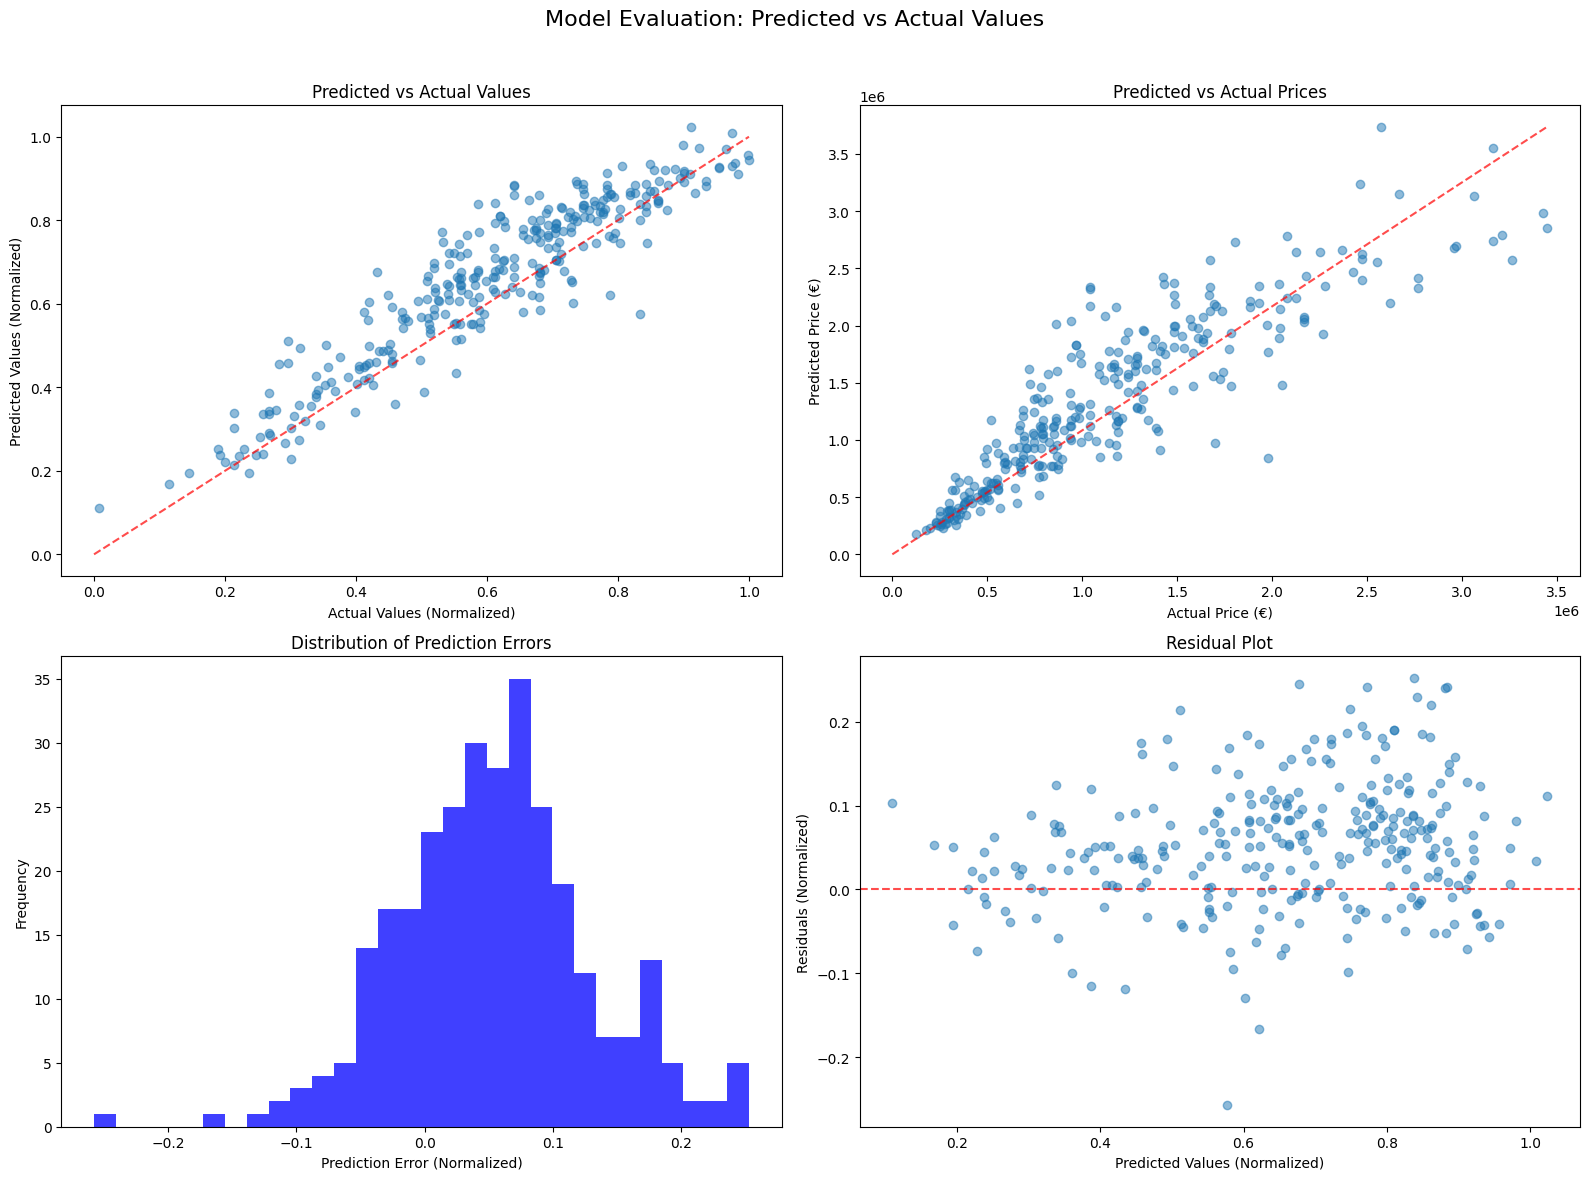

Error Statistics:
Mean Error: 0.05381799160584799
Standard Deviation of Error: 0.0752099838471474
Max Overestimation: 0.2525323093938181
Max Underestimation: -0.25751451147597715


In [1547]:
# Visualize model predictions vs actual values

# Create a figure with 3 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Evaluation: Predicted vs Actual Values', fontsize=16)

# 1. Scatter plot of predicted vs actual values
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([0, 1], [0, 1], 'r--', alpha=0.7)  # Diagonal line representing perfect predictions
axes[0, 0].set_xlabel('Actual Values (Normalized)')
axes[0, 0].set_ylabel('Predicted Values (Normalized)')
axes[0, 0].set_title('Predicted vs Actual Values')

# 2. Scatter plot with original price values (not normalized)
axes[0, 1].scatter(np.expm1(scaler_price.inverse_transform(y_test)), np.expm1(scaler_price.inverse_transform(y_pred)), alpha=0.5)
axes[0, 1].plot([0, max(np.expm1(scaler_price.inverse_transform(y_test)))[0]], [0, max(np.expm1(scaler_price.inverse_transform(y_pred)))[0]], 'r--', alpha=0.7) 
axes[0, 1].set_xlabel('Actual Price (€)')
axes[0, 1].set_ylabel('Predicted Price (€)')
axes[0, 1].set_title('Predicted vs Actual Prices')

# 3. Histogram of errors
errors = y_pred - y_test
axes[1, 0].hist(errors, bins=30, alpha=0.75, color='blue')
axes[1, 0].set_xlabel('Prediction Error (Normalized)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Prediction Errors')

# 4. Residual plot
axes[1, 1].scatter(y_pred, errors, alpha=0.5)
axes[1, 1].axhline(y=0, color='r', linestyle='--', alpha=0.7)
axes[1, 1].set_xlabel('Predicted Values (Normalized)')
axes[1, 1].set_ylabel('Residuals (Normalized)')
axes[1, 1].set_title('Residual Plot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print summary statistics of errors
print("Error Statistics:")
print(f"Mean Error: {np.mean(errors)}")
print(f"Standard Deviation of Error: {np.std(errors)}")
print(f"Max Overestimation: {np.max(errors)}")
print(f"Max Underestimation: {np.min(errors)}")

In [1548]:
# Select one example from the test set
example_idx = 154  # You can change this to any index in the test set

# Get the features for this example and reshape for prediction
example_features = X_test[example_idx:example_idx+1]

# Make prediction using the trained model
example_pred = model.predict(example_features)

# Convert both prediction and actual value back to original scale
example_pred_orig = np.expm1(scaler_price.inverse_transform(example_pred))
example_actual_orig = np.expm1(scaler_price.inverse_transform(y_test[example_idx:example_idx+1]))

# Print the results
print(f"Example #{example_idx}:")
print(f"Predicted price: €{example_pred_orig[0][0]:,.2f}")
print(f"Actual price:    €{example_actual_orig[0][0]:,.2f}")
print(f"Difference:      €{example_actual_orig[0][0] - example_pred_orig[0][0]:,.2f}")
print(f"Error (%):       {((example_actual_orig[0][0] - example_pred_orig[0][0]) / example_actual_orig[0][0] * 100):,.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Example #154:
Predicted price: €808,594.50
Actual price:    €595,732.66
Difference:      €-212,861.84
Error (%):       -35.73%


In [1549]:
# import os
# import tensorflow as tf
# from datetime import datetime

# # Create a models directory if it doesn't exist
# if not os.path.exists('models'):
#     os.makedirs('models')

# # Save the model
# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# model_name = f"real_estate_price_predictor_{timestamp}"
# model_path = os.path.join('models', model_name)

# # Save in both SavedModel format and h5 format
# model.save(f"{model_path}.keras") 


# print(f"Model saved to {model_path}")